# Numpy 개요
- Numerical Python의 약자
- 고성능의 수치 해석용 python 라이브러리
- 대규모 다차원 배열과 행렬 연산에 필요한 다양한 함수를 제공

# Python 다차원 배열

## 숫자 자료형

In [2]:
# 세명의 학생의 수학과목 점수 설정
math1 = 11
math2 = 12
math3 = 13

In [3]:
# 합과 평균 구하기
total = math1+math2+math3
average = total/3

print(f'수학점수 합: {total}')
print(f'수학점수 평균: {average}')
# 새로운 값 추가시 로직을 변경해야함

수학점수 합: 36
수학점수 평균: 12.0


## 리스트 자료형

In [5]:
math_list = [11, 12, 13]

math_list.append(14)   # 새로운 자료 추가

total = 0
average = 0
for math in math_list:
    total += math
average = total / len(math_list)

print(f'수학점수 합: {total}')
print(f'수학점수 평균: {average}')

수학점수 합: 50
수학점수 평균: 12.5


- 모든 학생의 점수를 1점씩 더해야하는 경우 처리 방법?

In [6]:
math_list = [math+1 for math in math_list]
print(math_list)

[12, 13, 14, 15]


# Numpy 다차원 배열
- Numpy를 사용하면 중첩된 자료구조를 효율적으로 다룰 수 있다
- import numpy as np 형태로 사용하는게 일반적

In [8]:
import numpy as np

math_ndarray = np.array([[11,12,13], [21,22,23], [31,32,33]])   # 파이썬의 리스트를 넘파이의 다차원 배열로 변경
print(math_ndarray)     # python과 출력 형태가 다름, 2차원 배열 형태
print(type(math_ndarray))   # numpy의 다차원 배열

[[11 12 13]
 [21 22 23]
 [31 32 33]]
<class 'numpy.ndarray'>


In [9]:
# 각 원소에 1을 더하기
new_ndarry = math_ndarray + 1    
print(new_ndarry)

[[12 13 14]
 [22 23 24]
 [32 33 34]]


In [10]:
# 전체 합 구하기
np.sum(math_ndarray)

198

In [11]:
# 전체 평균 구하기
np.mean(math_ndarray)

22.0

In [12]:
# 행의 평균구하기
np.mean(math_ndarray, axis=1)

array([12., 22., 32.])

In [13]:
# 열의 평균구하기
np.mean(math_ndarray, axis=0)

array([21., 22., 23.])

# Numpy의 axis 정리
- 행렬의 모양을 다음과 같이 확인할 수 있다.
  - ndarray.shape
  - 1차원 벡터: (원소개수,)   # 튜플
  - 2차원 행렬: (행,열)
  - 3차원 행렬: (깊이, 행, 열)
  - shape의 결과값을 기준으로 axis 값이 0부터 부여된다.
  - 2차원 (행, 열)인 경우 axis 값이 각각 (0,1)이며 axis 0 -> 행, axis 1 -> 열을 나타냄
  - 3차원 (깊이, 행, 열)인 경우 axis 값이 각각 (0,1,2)이며 axis 0 -> 깊이, axis 1 -> 행, axis 2 -> 열을 나타냄


## 2차원 행렬의 축
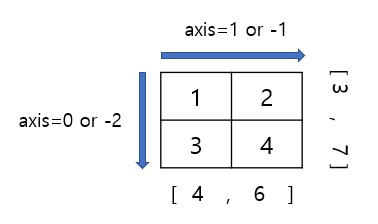

## 3차원 행렬의 축
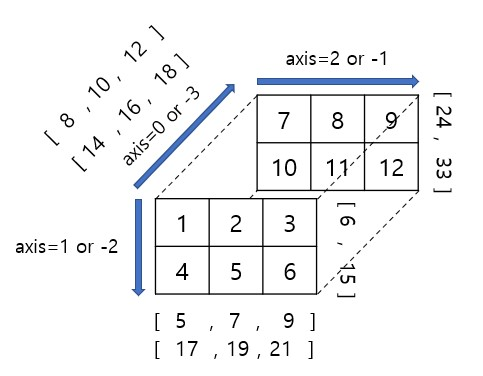

- 행의 축은 0, 열의 축은 1 이지만, 집계값은 행렬의 모양을 보고 방향에 따라 지정해야함 (연산 수행시)
- 결합 시에는 원래 행(열)의 축 값인 0(1)을 지정  (행렬의 모양 변경, 결합 시)

In [4]:
import numpy as np

array1 = np.array([[1,2],[3,4]])  # array: 다차원 배열을 만들 때
print(array1)
print(array1.shape)
print('-'*20)

array2 = np.array([[[1,2,3],
                    [4,5,6]],
                    [[7,8,9],
                     [10,11,12]]
                  ])   # 3차원 배열, 2차원 배열 두개, 깊이=2
print(array2)
print(array2.shape)

[[1 2]
 [3 4]]
(2, 2)
--------------------
[[[ 1  2  3]
  [ 4  5  6]]

 [[ 7  8  9]
  [10 11 12]]]
(2, 2, 3)


In [6]:
print('2차원 배열의 axis=0 기준 합', end='')   # 축값의 방향 대로 연산
print(np.sum(array1, axis=0))   

2차원 배열의 axis=0 기준 합[4 6]


In [7]:
print('2차원 배열의 axis=1 기준 합', end='')
print(np.sum(array1, axis=1))

2차원 배열의 axis=1 기준 합[3 7]


In [8]:
print('3차원 배열의 axis=0 기준 합')
print(np.sum(array2, axis=0))

3차원 배열의 axis=0 기준 합
[[ 8 10 12]
 [14 16 18]]


In [9]:
print('3차원 배열의 axis=1 기준 합')
print(np.sum(array2, axis=1))

3차원 배열의 axis=1 기준 합
[[ 5  7  9]
 [17 19 21]]


In [10]:
print('3차원 배열의 axis=2 기준 합')
print(np.sum(array2, axis=2))

3차원 배열의 axis=2 기준 합
[[ 6 15]
 [24 33]]


# Numpy 특징

## python의 리스트가 느린 이유
- 파이썬 리스트는 포인터(데이터의 주소값)의 배열이다. 
- 따라서 각각의 객체가 메모리 여기저기에 흩어져 있다.
- 그러므로 캐시 활용(데이터의 재활용)이 어렵다.

## numpy의 ndrarray가 빠른 이유
- 타입을 명시하여 원소의 배열로 데이터를 유지한다.
- 다차원 데이터도 연속된 메모리 공간이 할당된다.

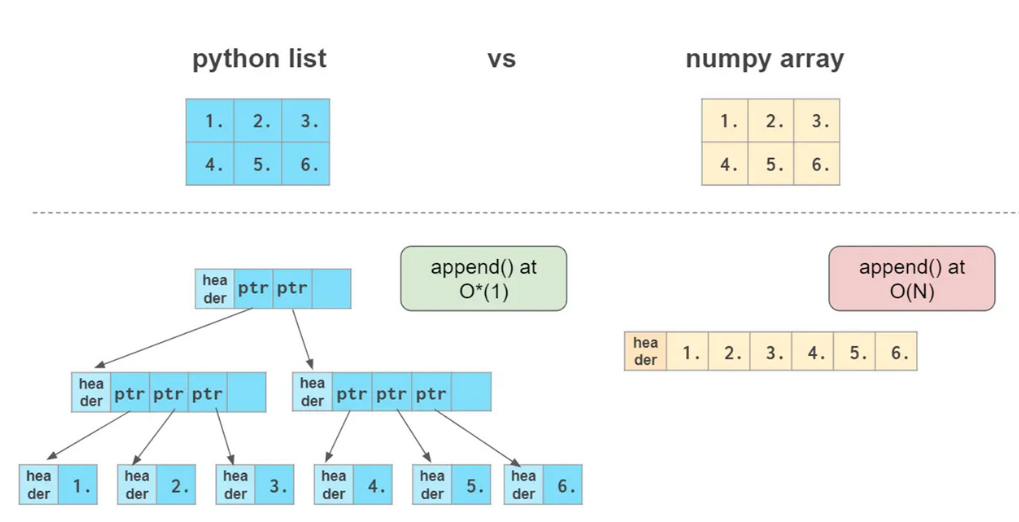

# 배열 생성 - 1

## array()를 이용한 생성
- python의 list나 tuple을 이용해서 numpy의 ndarray를 생성한다.
- 다차원 배열의 모든 원소는 `동일한 데이터 타입`을 가져야 한다.

### 정수형
- int64, int32(기본타입), int16, int8, uint64(unsigned int,양수만) 형이 있다.
- int64: -2^63 ~ 2^63-1 까지의 정수 표현
- uint64: 0 ~ 2^64-1

In [12]:
intArray = np.array([[1,2], [3,4]])
print(intArray.dtype)   # 데이터 타입 확인

int32


In [13]:
uintArray = np.array([[1,2],[3,4]], dtype='uint')   # 데이터 타입 지정
print(uintArray.dtype)

uint32


### 실수형
- 실수형의 default type은 'float64'

In [14]:
floatArray = np.array([[1.1, 2.2],[3.3,4.4]])
print(floatArray.dtype)

float64


## 형변환
- 데이터가 정수로 입력되더라도 dtype의 값으로 실수형을 명시한다면 실수형으로 자동 형변환이 일어난다

In [15]:
a = np.array(['1','2', 3, 4], dtype=np.float64)  # 파이썬의 리스트는 서로다른 데이터타입 가질 수 있지만 넘파이는 안됨, 실수형으로 자동 형변환
print(a)
print(type(a[0]))

[1. 2. 3. 4.]
<class 'numpy.float64'>


In [16]:
# copy 옵션의 사용
a = np.array([1,2,3,4])
b = np.array(a, copy=False)   # copy=False이면 새로운 ndarray 생성 안함, 동일한 참조값을 받은 것,  b = a와 동일한 표현

print(a, id(a))
print(b, id(b))

[1 2 3 4] 1558216319760
[1 2 3 4] 1558216319760


## arange()를 이용한 생성
- 일련의 숫자를 만들기 위해 arange() 함수를 사용한다.

In [17]:
a = np.arange(1, 10)
print(a)

b = np.arange(10, 30, 5)
print(b)

# step 값으로 실수를 사용할 수 있는 것이 range()함수와의 차이
c = np.arange(0, 2, 0.3)
print(c)

[1 2 3 4 5 6 7 8 9]
[10 15 20 25]
[0.  0.3 0.6 0.9 1.2 1.5 1.8]


## Numpy 배열의 주요 속성
1. ndarray.shape: numpy 배열의 차원을 튜플 타입으로 반환
2. ndarray.dtype: 배열의 자료형을 반환
3. ndarray.ndim: dimension의 차수를 정수로 반환
4. ndarray.size: 배열의 요소의 총 개수를 정수 값으로 반환

In [21]:
a = np.arange(10)
print(a)
print(a.shape)
print(a.dtype)
print(a.ndim)
print(a.size)

[0 1 2 3 4 5 6 7 8 9]
(10,)
int32
1
10


# 배열 생성 - 2

## np.zeros()
- 모든 요소가 0으로 이루어진 지정한 크기의 새로운 배열을 생성

In [26]:
a = np.zeros(4, dtype='int')  # dtype=np.int32
print(a)
b = np.zeros((3,3))  # 튜플로 크기 지정 (행, 열)
print(b)

# np.zeros_like(ndarray) : 지정된 배열과 같은 형태의 새로운 배열을 생성
c = np.array([[1,2,3],[4,5,6],[7,8,9]])
print(np.zeros_like(c))  # 데이터 타입도 동일하게 생성

[0 0 0 0]
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
[[0 0 0]
 [0 0 0]
 [0 0 0]]


In [27]:
a = np.array([True, False, False, True])
print(a.dtype)

bool


## np.ones()
- 모든 요소가 1으로 이루어진 지정한 크기의 새로운 배열을 생성

In [29]:
print(np.ones((2,3)))
print(np.ones_like(c))

[[1. 1. 1.]
 [1. 1. 1.]]
[[1 1 1]
 [1 1 1]
 [1 1 1]]


## np.full()
- 지정한 크기에 입력한 원소를 전부 채운 배열을 생성

In [32]:
print(np.full((2,2), 2))   # 지정할 배열의 크기, 배열에 채울 원소값
print(np.full_like(c, 0.1, dtype=float))  # 원본 배열 c가 정수형 데이터타입 가지기때문에 실수형으로 형변환 필요

[[2 2]
 [2 2]]
[[0.1 0.1 0.1]
 [0.1 0.1 0.1]
 [0.1 0.1 0.1]]


[문제] 배열생성
- 1~10 사이의 값에 대해 다음의 조건에 맞는 2차원 배열을 생성하시오
- 첫 번째 행은 역순으로 나열된 홀수 정수의 요소를 갖고, 두번째 행은 짝수 정수의 요소를 갖는다.

In [39]:
array1 = np.array([[9,7,5,3,1],[2,4,6,8,10]])
print(array1)
a = np.array([np.arange(9, 0 , -2), np.arange(2, 11, 2)])
print(a)

[[ 9  7  5  3  1]
 [ 2  4  6  8 10]]
[[ 9  7  5  3  1]
 [ 2  4  6  8 10]]


In [38]:
a = np.arange(9, 0, -2)
print(a)
b = np.arange(2, 11, 2)
print(b)
array2 = np.array([a, b])
print(array2)

[9 7 5 3 1]
[ 2  4  6  8 10]
[[ 9  7  5  3  1]
 [ 2  4  6  8 10]]


# 배열 생성 - 3

## np.linspace()
- start부터 stop의 범위에서 num개를 동일한 간격으로 데이터를 생성하여 배열을 만든다

In [40]:
print(np.linspace(0, 2, 9))  # 0이상 2이하의 범위에서 9개만큼 등분하여 요소 설정

[0.   0.25 0.5  0.75 1.   1.25 1.5  1.75 2.  ]


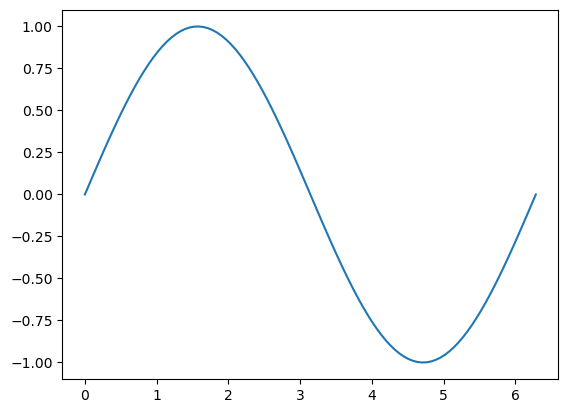

In [2]:
import numpy as np

x = np.linspace(0, np.pi*2, 100)
y = np.sin(x)

import matplotlib.pyplot as plt

plt.plot(x, y)
plt.show()

## np.identity(), np.eye()
- 지정한 크기의 정방 **단위 행렬**을 생성
- 단위 행렬은 주대각선의 원소가 모두 1이며 나머지 원소는 모두 0인 정사각형 행렬이다
- eye() 함수는 행과 열의 크기가 다른 단위행렬도 만들 수 있다.

In [8]:
print(np.identity(2))
print(np.identity(3, dtype=int))
print('-'*20)

print(np.eye(3))
print(np.eye(3,4))
print('-'*20)

# 세번째 값이 1 -> 대각선 인덱스 의미, 기본값은 0
# 양수 값은 위쪽 대각선(열)의 위치 값
# 음수 값은 아래쪽 대각선(행)의 위치 값
print(np.eye(3,4,1))
print(np.eye(3,4,-1))

[[1. 0.]
 [0. 1.]]
[[1 0 0]
 [0 1 0]
 [0 0 1]]
--------------------
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]]
--------------------
[[0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]
[[0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]]


# 배열의 변경

## np.reshape() / ndarray.reshape()
- <font color='red'>원본을 변경하지 않고</font> 배열을 새로운 모양으로 수정한다
- 원본 배열의 요소의 개수가 변경할 모양의 배열 요소의 개수가 다르면 error 발생시킴

In [17]:
a = np.arange(6)
print(a)

b = a.reshape((3,2))  # np.reshape(a, (3,2))와 동일
print(b)
print(a)  # 원본 배열의 모양이 변하지 않는다.
print('-'*20)

c = np.reshape(a, (1,6))
print(c)
print('-'*20)

d = np.reshape(a, (-1, 2))  # 열의 크기를 2로 맞추고 행의 크기는 전체 요소 개수에 맞춰서 알아서 지정한다. -> 3행2열
print(d)
print('-'*20)

e = np.arange(1, 11).reshape(2,5)
print(e)
f = e.reshape((-1, 2, 1))  # 2행 1열로 변환하면서 깊이값은 알아서 지정
print(f)
print('-'*20)

g = f.reshape(-1)   # -1 -> 행령의 값이 없으므로 요소를 1차원으로 나타냄 
print(g)

[0 1 2 3 4 5]
[[0 1]
 [2 3]
 [4 5]]
[0 1 2 3 4 5]
--------------------
[[0 1 2 3 4 5]]
--------------------
[[0 1]
 [2 3]
 [4 5]]
--------------------
[[ 1  2  3  4  5]
 [ 6  7  8  9 10]]
[[[ 1]
  [ 2]]

 [[ 3]
  [ 4]]

 [[ 5]
  [ 6]]

 [[ 7]
  [ 8]]

 [[ 9]
  [10]]]
--------------------
[ 1  2  3  4  5  6  7  8  9 10]


## np.resize() / ndarray.resize()
- <font color='red'> reshape과의 차이: 원본 배열은 새로운 shape으로 수정한다</font>
- 대상 배열의 요소의 개수가 원래 배열과 동일하지 않으면 크기를 강제로 조정한다 (0으로 채움)

In [19]:
a = np.arange(12)
a.resize((3,4))  # 결과를 반환하지 않음, 원본의 모양을 바꿈
print(a)
print('-'*20)

a.resize((4,4))  # 원본의 요소의 개수가 달라도 에러 발생하지 않음, 강제로 0으로 채워서 조정
print(a)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
--------------------
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [ 0  0  0  0]]


## ndarray.flatten() / ndarray.ravel()
- 배열을 1차원으로 만든다
- flatten()은 배열을 복사해서 1차원으로 변경 따라서 원본에 영향을 미치지 않는다
- ravel()은 원본을 복사하는 것이 아니므로 메모리 낭비가 없다. 단, 값을 수정하면 원본도 수정된다

In [20]:
a = np.arange(1, 5).reshape(2,2)
print(a)
print(a.flatten())

[[1 2]
 [3 4]]
[1 2 3 4]


In [25]:
a = np.arange(1, 5).reshape(2,2)
r = a.ravel()
print(r)

a[1,1] = 5
print(a)   # ravel을 사용해도 차원은 바뀌지 않음
print(r)   # 원본에서 값이 변경되면 같이 변경됨 

[1 2 3 4]
[[1 2]
 [3 5]]
[1 2 3 5]


## np.expand_dims()
- 지정한 axis의 위치에 다차원 배열의 차원을 늘려줌
- 축값에 튜플을 입력하면 두 차원을 확장할 수 있음

In [29]:
a = np.array([1,2])
print(a)
print(a.shape)
print('-'*20)

# 1차원 벡터에 첫 번째 축(행 축)을 추가하여 2앞에 1이 추가되어 (1,2)의 모양으로 확장됨
b = np.expand_dims(a, axis=0)  # 행 축을 하나 늘리기
print(b)
print(b.shape)
print('-'*20)

c = np.expand_dims(a, axis=1)
print(c)
print(c.shape)

[1 2]
(2,)
--------------------
[[1 2]]
(1, 2)
--------------------
[[1]
 [2]]
(2, 1)


In [33]:
a = np.arange(1,7).reshape(2,3)
print(a)
print(a.shape)
print('-'*20)

# 2차원 행렬을 깊이 축(axis=0)으로 확장 
b = np.expand_dims(a, axis=0)
print(b)
print(b.shape)
print('-'*20)

c = np.expand_dims(a, axis=1)  # 3차원으로 확장되면서 지정된 축에 1을 삽입
print(c)
print(c.shape)
print('-'*20)

d = np.expand_dims(a, axis=2)
print(d)
print(d.shape)

[[1 2 3]
 [4 5 6]]
(2, 3)
--------------------
[[[1 2 3]
  [4 5 6]]]
(1, 2, 3)
--------------------
[[[1 2 3]]

 [[4 5 6]]]
(2, 1, 3)
--------------------
[[[1]
  [2]
  [3]]

 [[4]
  [5]
  [6]]]
(2, 3, 1)


In [6]:
import numpy as np

x = np.array([1, 2])
print(x)
print(x.shape)
print('-' * 20)

y = np.expand_dims(x, axis=(0, 1))  # 축에 튜플 값을 입력하면 두 개 차원 확장 가능  (0, 1) -> 깊이와 행에 축 확장
print(y)
print(y.shape)
print('-' * 20)

z = np.expand_dims(x, axis=(2, 0))
print(z)
print(z.shape)

[1 2]
(2,)
--------------------
[[[1 2]]]
(1, 1, 2)
--------------------
[[[1]
  [2]]]
(1, 2, 1)


## np.newaxis()

In [40]:
a = np.arange(4)
print(a)
print(a.shape)
print('-'*20)

row_vect = a[np.newaxis, :]  # [행, 열]  np.newaxis-> 새로운 행추가, ':'-> 모든 데이터 넣기
print(row_vect)
print(row_vect.shape)
print('-'*20)

col_vect = a[:, np.newaxis]   # 새로운 열 추가
print(col_vect)
print(col_vect.shape)

[0 1 2 3]
(4,)
--------------------
[[0 1 2 3]]
(1, 4)
--------------------
[[0]
 [1]
 [2]
 [3]]
(4, 1)


## ndarray.astype()
- 배열의 데이터 타입을 변경

In [42]:
a = np.array([1,2,3])
print(a)
print(a.dtype)

a_float = a.astype(np.float32)
print(a_float)
print(a_float.dtype)

[1 2 3]
int32
[1. 2. 3.]
float32


## np.squeeze()
- 배열의 차원을 축소

In [50]:
a = np.array([[[0],[1],[2]]])
print(a.shape)
print('-'*20)

b = np.squeeze(a)  # 축옵션을 넣지 않으면 1차원 벡터로, flatten()과 같은 기능
print(b.shape)
print(b)
print('-'*20)

c = np.squeeze(a, axis=0)  # 깊이 축을 축소
print(c.shape)
print(c)
print('-'*20)

# d = np.squeeze(a, axis=1)  # 행 축을 축소, error, 원본의 원소 개수와 일치하지 않음

x = np.array([[1234]])
print(x.shape)
print('-'*20)

y = np.squeeze(x)
print(y.shape)   # 1차원 벡터값이 아닌 scala 값(단일값)으로 변경
print(y)

(1, 3, 1)
--------------------
(3,)
[0 1 2]
--------------------
(3, 1)
[[0]
 [1]
 [2]]
--------------------
(1, 1)
--------------------
()
1234


## np.concatenate()
- 두 개 이상의 배열을 연결한다
- 연결을 수행하려면 차원 수가 같아야 한다

In [54]:
a = np.arange(1,5).reshape(2,2)
print(a)
print('-'*20)

b = np.array([5,6])
print(b)
print('-'*20)

# print(np.concatenate((a,b)))    # 연결하고자 하는 배열을 튜플로 입력,  차원수가 다르기 떄문에 에러 발생
print(np.concatenate((a,np.expand_dims(b, axis=0))))  # (2,) -> (1,2)로 변경이 되어야 하므로 axis=0으로 지정, 행,열 개수도 같아야함

[[1 2]
 [3 4]]
--------------------
[5 6]
--------------------
[[1 2]
 [3 4]
 [5 6]]


In [59]:
# 세 개 이상의 배열을 연결할 수도 있다
b = np.array([[5,6]])
c = np.array([[7,8]])
d = np.concatenate((a,b,c))  
print(d)

[[1 2]
 [3 4]
 [5 6]
 [7 8]]


In [60]:
# axis 인수를 설정하면 연결 방향을 설정 가능
# 기본값은 axis=0
# e = np.concatenate((a, b), axis=1)  # 열 기준으로 연결시 행의 개수가 같아야함, 행 기준으로 연결시 열의 개수가 같아야함

e = np.concatenate((a,b.T), axis=1)   # b.T는 행렬 b를 행과 열의 방향을 바꾼다.(전치)
print(e)

[[1 2 5]
 [3 4 6]]


# 기본연산
- 배열에 대한 산술연산자는 요소별로 적용된다.
- 연산 시 자료형은 적절하게 형변환(upcasting)된다

In [64]:
a = np.ones(3, dtype=np.int32)
print(a.dtype.name)

b = np.linspace(0, np.pi, 3)
print(b.dtype.name)

c = a + b
print(c)

int32
float64
[1.         2.57079633 4.14159265]


## 통계연산
- 통계연산은 axis와 밀접한 관련이 있다
- 축 값을 입력하지 않으면 모든 원소에 대한 연산 결과를 출력한다

In [71]:
a = np.arange(12).reshape(3,4)
print(a)
print('-'*20)

print(a.sum())  # 모든 원소에 대한 합
print('-'*20)

print(a.sum(axis=0))  # 각 열의 합  # 축값의 방향 기준
print('-'*20)

print(a.mean(axis=1))  # 각 행의 평균
print('-'*20)

print(a.cumsum(axis=1))  # 각 행의 누적합
print('-'*20)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
--------------------
66
--------------------
[12 15 18 21]
--------------------
[1.5 5.5 9.5]
--------------------
[[ 0  1  3  6]
 [ 4  9 15 22]
 [ 8 17 27 38]]
--------------------


### np.average()
- 주어진 축에 따라 가중평균을 계산
- 가중 평균을 구하는 식: avg = sum(a * weights) / sum(weights)

In [73]:
a = np.arange(6).reshape(3,2)
print(a)

# sum(0*(1/4) + 1*(3/4)) / sum(1/4+3/4) = 0.75
# 가중치: 각 값의 중요도  예) 성적: 기말고사에 70퍼센트 반영, 출석에 30퍼센트 반영
print(np.average(a, axis=1, weights=[1/4, 3/4])) 

[[0 1]
 [2 3]
 [4 5]]
[0.75 2.75 4.75]


### np.amin() / np.amax()
- axis을 따른 배열의 최소 또는 최대값을 찾아내기 

In [77]:
a = np.arange(1,10).reshape(3,3)
print(a)
print('-'*20)

print(np.amin(a, axis=0))  # 각 열 별 최소값
print('-'*20)
print(np.amax(a, axis=0))
print('-'*20)
print(np.amin(a))  # 전체 원소에서 최소값 

[[1 2 3]
 [4 5 6]
 [7 8 9]]
--------------------
[1 2 3]
--------------------
[7 8 9]
--------------------
1


### np.median()
- axis를 따른 배열의 중앙값

### np.var(), np.std()
- 지정된 축을 따른 분산과 표준편차

## 최소값, 최대값 아규먼트 위치
- np.argmax(): 제일 큰 값 위치 정보를 반환
- np.argmin(): 제일 작은 값 위치 정보를 반환
- np.where(조건): 조건에 맞는 값 위치 정보 반환
- np.where(조건, 조건에 맞을 때 값, 조건과 다를 때 값)

In [79]:
a = np.array([5,6,2,52,90,1,6])
print(np.argmax(a))
print(np.argmin(a))

4
5


In [82]:
print(np.where(a > 5))  # a배열에서 5를 초과하는 위치 정보
print(np.where(a > 5, 1, -1)) # 5를 초과하면 1, 초과하지 않으면 -1
print(np.where(a > 5, a, 0))

(array([1, 3, 4, 6], dtype=int64),)
[-1  1 -1  1  1 -1  1]
[ 0  6  0 52 90  0  6]


## 비교 연산
- 연산자를 이용하여 요소별(element-wise) 비교
- ==, !=, >, >=, <, <=

In [7]:
import numpy as np

a = np.array([1,2,3])
b = np.array([1,2,3])
c = np.array([3,2,5])

print(a == b)   
print('-' * 20)
print(a == c)   # 상응하는 요소끼리 비교

[ True  True  True]
--------------------
[False  True False]


In [10]:
a = np.arange(1, 10).reshape(3, 3)
print(a)
print('-' * 20)

result = a % 2 == 0    # boolen 값 반환
print(result)
print(np.sum(result))   # True(1)인 요소의 개수 확인

[[1 2 3]
 [4 5 6]
 [7 8 9]]
--------------------
[[False  True False]
 [ True False  True]
 [False  True False]]
4


### np.all(), np.any()를 이용한 비교 
- all(): 요소 전체가 같아야 하나의 True 값을 반환
- any(): 요소 전체 중 하나만 같아도 True 값을 반환

In [12]:
a = np.array([1,2,3])
b = np.array([1,2,3])
c = np.array([3,2,5])

print(np.all(a == b))
print(np.all(a == c))
print('-'*20)

print(np.any(a == b))
print(np.any(a == c))

True
False
--------------------
True
True


## 논리 연산
- np.logical_and(), np.logical_or(), np.logical_not(), np.logical_xor()

In [16]:
x = np.arange(1, 11).reshape(2, 5)
print('x 행렬:')
print(x)

y = x%2 == 0
print('y 행렬: 짝수면 true 홀수면 false')
print(y)

z = x >= 4
print('z 행렬: 4 이상이면 True, 미만이면 False')
print(z)
print('-'*20)

print('y and z 행렬')
print(np.logical_and(y, z))
print('y and z 행렬의 총합')
print(np.sum(np.logical_and(y, z))) # 매개변수로 두 개만 넣을 수 있음, 중첩해서 logical_and()사용하여 3개 이상 논리연산
print(x[np.logical_and(y, z)])   # boolean indexing

x 행렬:
[[ 1  2  3  4  5]
 [ 6  7  8  9 10]]
y 행렬: 짝수면 true 홀수면 false
[[False  True False  True False]
 [ True False  True False  True]]
z 행렬: 4 이상이면 True, 미만이면 False
[[False False False  True  True]
 [ True  True  True  True  True]]
--------------------
y and z 행렬
[[False False False  True False]
 [ True False  True False  True]]
y and z 행렬의 총합
4
[ 4  6  8 10]


## 정렬

- np.sort(): 데이터를 오름차순으로 정렬한다
- 내림차순으로 정렬하는 별도의 옵션은 없다

In [17]:
import numpy as np

np.random.seed(10)
data = np.random.randint(1, 50, 10)  # numpy의 randint는 끝 값 포함하지 않음 python은 포함, numpy는 다차원 배열의 형태로 한번에 생성가능
print(data)

[10 37 16  1 29 26 30 49 30  9]


In [23]:
print(np.sort(data))
print(np.sort(data)[::-1])  # 내림차순  -> 거꾸로 읽도록 인덱싱

[ 1  9 10 16 26 29 30 30 37 49]
[49 37 30 30 29 26 16 10  9  1]


- np.argsort(): 오름차순으로 정렬한 데이터의 정렬 전 인덱스 값을 반환한다

In [24]:
# [10 37 16  1 29 26 30 49 30  9]
# [ 1  9 10 16 26 29 30 30 37 49]로 정렬 후 원본데이터의 인덱스값을 반환
print(np.argsort(data))

[3 9 0 2 5 4 6 8 1 7]


In [26]:
# argsort()를 이용한 정렬
idx = np.argsort(data)
print(data[idx])  # data[[0,1]]: fancy indexing  # data에서 0번째와 1번째 위치의 값 가져옴 

[ 1  9 10 16 26 29 30 30 37 49]


[문제] 학생 이름과 점수 데이터를 이용하여 성적이 우수한 학생 순서로 이름을 출력하세요.

In [32]:
name = np.array(['홍길동', '저팔계', '사오정', '전우치', '삼장법사'])
score = np.array([75, 100, 95, 56, 99])

sorted_score = np.argsort(score)[::-1]
print(sorted_score)
print(name[sorted_score])

[1 4 2 0 3]
['저팔계' '삼장법사' '사오정' '홍길동' '전우치']


# 행렬 연산

## * 연산자
- 형태가 동일한 두 행렬을 원소끼리 (element-wise) 곱하는 연산자
- shape이 다르면 오류발생
- 교환법칙이 성립: A*B == B*A

In [37]:
a = np.array([[1,1],
              [0,1]])
b = np.array([[2,0],
              [3,4]])
print(a*b)  # 서로 상응하는 원소끼리 곱한 결과 반환
print(b*a)  # 교환법칙 성립

a = np.arange(6).reshape(2,3)
b = np.arange(6).reshape(3,2)
# print(a*b)  # 배열의 shape이 달라서 에러 발생

[[2 0]
 [0 4]]
[[2 0]
 [0 4]]


## np.dot()
- 두 벡터의 내적을 계산하는 함수
  - 내적이란 벡터에서 서로 대응하는 성분끼리 곱한 다음 그것들을 모두 더한 것을 말한다. 내적의 값은 단일값인 스칼라가 된다
  - a·b 또는 <a,b>로 표현: a1*b1 + a2*b2 + ... + an*bn
- 행렬 곱에서도 사용이 가능하지만, 공식 문서에서는 np.matmul() 함수 사용을 권장 

In [38]:
a = np.array([3,4,6,3,9])
b = np.array([6,8,1,3,9])
c = np.dot(a, b)  # a.dot(b)도 동일한 표현
print(c)  # 3*6 + 8*4 + 6*1 + 3*3 + 9*9

146


In [40]:
a = np.array([[1,1],
              [0,1]])
b = np.array([[2,0],
              [3,4]])
print(a.dot(b))   # 행렬의 곱, 첫번째 행렬이 n*m이면 두번째 행렬이 m*n이어야 행렬의 곱 가능
# 즉, 첫번쨰 행렬의 열의 크기와 두번째 행렬의 행의 크기가 같아야 한다.

print(b.dot(a))   # 교환법칙 성립안함

[[5 4]
 [3 4]]
[[2 2]
 [3 7]]


## np.matmul() / @ 연산자
- 행렬의 곱 연산 수행

In [42]:
a = np.array([[1,1],
              [0,1]])
b = np.array([[2,0],
              [3,4]])

print(a@b)

a = np.array([[1,0,3],[0,2,4]])  # shape -> (2,,3)
b = np.array([[4,1],[2,2],[2,3]])  # shape -> (3,2)

print(np.matmul(a,b))  # 2x3 @ 3x2 -> 2x2

[[5 4]
 [3 4]]
[[10 10]
 [12 16]]


## 전치 (transpose)
- 전치는 기존 행렬의 행과 열을 교환하는 것. 즉, 주대각선을 기준으로 반사 대칭하는 것을 말한다.

In [44]:
x = np.arange(1,5).reshape(2,2)
print(x)
print(x.T)
print(np.transpose(x))

[[1 2]
 [3 4]]
[[1 3]
 [2 4]]
[[1 3]
 [2 4]]


# 인덱싱, 슬라이싱, 반복

## 인덱싱

In [47]:
import numpy as np

a = np.arange(1,11).reshape(2,5)
print(a)
print(a[0][0])
print(a[0,0])  # [row, col]  --> 리스트에서는 불가한 표현

[[ 1  2  3  4  5]
 [ 6  7  8  9 10]]
1
1


## boolean indexing (masking)

In [53]:
a = np.arange(1, 25).reshape(4,6)
print(a)
print('-'*20)

even_arr = a%2 == 0  # masking array
print(even_arr)
print('-'*20)

print(a[even_arr])  # 전체요소 중 True인 값(짝수인 값)만 추출, 같은표현: print(a[a%2==0])
print('-'*20)
print(sum(a[a%2==0]))  # a배열에서 짝수의 값들의 합 구하기

[[ 1  2  3  4  5  6]
 [ 7  8  9 10 11 12]
 [13 14 15 16 17 18]
 [19 20 21 22 23 24]]
--------------------
[[False  True False  True False  True]
 [False  True False  True False  True]
 [False  True False  True False  True]
 [False  True False  True False  True]]
--------------------
[ 2  4  6  8 10 12 14 16 18 20 22 24]
--------------------
156


## fancy indexing
- 배열의 각 요소 선택을 인덱스 배열을 전달하여 참조하는 방식
- fancy indexing은 복사본이 생성됨. 즉, fancy indexing으로 가져온 배열의 값을 변경해도 원본에는 영향을 미치지 않음

In [60]:
a = np.arange(15).reshape(5,3)
print(a)
print('-'*20)

# 0행, 2행만 인덱싱
print(a[[0,2],])  # a[[0,2],:]
print('-'*20)

# 전체 행에 대해 0열, 2열만 인덱싱
print(a[:,[0,2]])
print('-'*20)

# 두 번 인덱싱
print(a[[0,2,4]])  # 0,2,4행 인덱싱
print('-'*20)
print(a[[0,2,4]][:,[0,2]])  # 0,2,4행 인덱싱 후 0,2열 인덱싱

[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]
 [12 13 14]]
--------------------
[[0 1 2]
 [6 7 8]]
--------------------
[[ 0  2]
 [ 3  5]
 [ 6  8]
 [ 9 11]
 [12 14]]
--------------------
[[ 0  1  2]
 [ 6  7  8]
 [12 13 14]]
--------------------
[[ 0  2]
 [ 6  8]
 [12 14]]


In [63]:
a = np.arange(15).reshape(5,3)
print(a)
print('-'*20)

copied = a[[0,2,4]][:,[0,2]]
print(copied)
print('-'*20)

copied[0,:] = 100
print(copied)
print('-'*20)

print(a)  # fancy indexing으로 가져온 값을 변경해도 원본은 수정되지 않음, fancy indexing시에 복사본이 생성되기 때문

[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]
 [12 13 14]]
--------------------
[[ 0  2]
 [ 6  8]
 [12 14]]
--------------------
[[100 100]
 [  6   8]
 [ 12  14]]
--------------------
[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]
 [12 13 14]]


## 슬라이싱
- ndarray[행 시작값: 행 끝 값, 열 시작값: 열 끝 값]
- 시작값부터 끝 값 전까지 슬라이싱

In [71]:
a = np.arange(1,13).reshape(3,4)
print(a)
print('-'*20)

print(a[0:2, 0:4])  # 1행 3열까지
print('-'*20)

print(a[:2,:])  # 위와 동일
print('-'*20)

print(a[:2])  # 위와 동일

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]
--------------------
[[1 2 3 4]
 [5 6 7 8]]
--------------------
[[1 2 3 4]
 [5 6 7 8]]
--------------------
[[1 2 3 4]
 [5 6 7 8]]


- 슬라이싱은 동일한 메모리 영역에 뷰를 반환
- 즉, 뷰의 값을 수정하면 원본 배열의 값도 수정됨

In [74]:
a = np.arange(9).reshape(3,3)
a_view = a[0:1]
print(a_view)
a_view[0] = [9, 10, 11]  # 뷰의 값 수정 
print(a)  # 원본 배열의 값도 수정됨, 뷰의 변화에 영향을 받음

[[0 1 2]]
[[ 9 10 11]
 [ 3  4  5]
 [ 6  7  8]]


[문제] 슬라이싱 실습

In [96]:
a = np.arange(1,25).reshape(4,6)
print(a)
print('-'*20)

# (1) 가운데 요소 가져오기
print(a[1:3,2:4])
print('-'*20)

# (2) 0 ~ 1행과 모든 컬럼 가져오기
print(a[0:2,:])  # a[:2]
print('-'*20)

# (3) 전체 행과 1,2열 가져오기
print(a[:,1:3])
print('-'*20)

# (4) 1행과 0,1열 가져오기
print(a[1:2,:2])
print('-'*20)

# (5) 각 행의 마지막 열 데이터만 추출해서 2차원 열벡터로 변경하기
print(a[:,5].reshape(4,1))  # a[:, -1].reshape(-1,1) 슬라이싱시 음수도 사용가능

[[ 1  2  3  4  5  6]
 [ 7  8  9 10 11 12]
 [13 14 15 16 17 18]
 [19 20 21 22 23 24]]
--------------------
[[ 9 10]
 [15 16]]
--------------------
[[ 1  2  3  4  5  6]
 [ 7  8  9 10 11 12]]
--------------------
[[ 2  3]
 [ 8  9]
 [14 15]
 [20 21]]
--------------------
[[7 8]]
--------------------
[[ 6]
 [12]
 [18]
 [24]]


## 인덱싱 & 슬라이싱과 차원
- 정수 인덱싱과 슬라이싱을 혼합해서 사용하면 낮은 차원의 배열이 생성된다.
- 하지만 슬라이싱만 사용하면 원본 배열과 동일한 차원의 배열이 생성된다.

In [103]:
a = np.arange(1, 13).reshape(3,4)
print(a, a.shape, a.ndim)
print('-'*30)

print('슬라이싱만 사용')
sliceRow = a[:1, :]
print(sliceRow, sliceRow.shape, sliceRow.ndim)   # 원본과 동일한 차원 유지
print('-'*30)

print('인덱싱만 사용')
indexedRow = a[0]
print(indexedRow, indexedRow.shape, indexedRow.ndim)  # 1차원 벡터로 차원이 낮아짐
print('-'*30)

print('인덱싱과 슬라이싱 혼합')
indexedRow2 = a[0, :]
print(indexedRow2, indexedRow2.shape, indexedRow2.ndim) # 1차원 벡터로 차원이 낮아짐
print('-'*30)

print('펜시 인덱싱 사용(배열 인덱싱)')
fancytIdx = a[[0,2], :]
print(fancytIdx, fancytIdx.shape, fancytIdx.ndim)  # 원본배열과 동일한 차원 생성, 정수인덱싱과 다름

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]] (3, 4) 2
------------------------------
슬라이싱만 사용
[[1 2 3 4]] (1, 4) 2
------------------------------
인덱싱만 사용
[1 2 3 4] (4,) 1
------------------------------
인덱싱과 슬라이싱 혼합
[1 2 3 4] (4,) 1
------------------------------
펜시 인덱싱 사용(배열 인덱싱)
[[ 1  2  3  4]
 [ 9 10 11 12]] (2, 4) 2


# Broadcasting
- shape이 다른 다차원 배열이 연산을 하려고 할 때 특정 조건이 만족되면 자동으로 연산이 가능한 상태로 변환되는 것
- 벡터나 배열 또는 배열과 스칼라 간의 사칙연산을 하면 같은 위치의 원소끼리 계산이 이뤄진다. 
- 이 때 벡터나 배열이 모양이 같아야 하므로 작은 차원의 데이터가 큰 차원의 데이터로 모양이 맞춰지는 것을 broadcasting이라고 한다
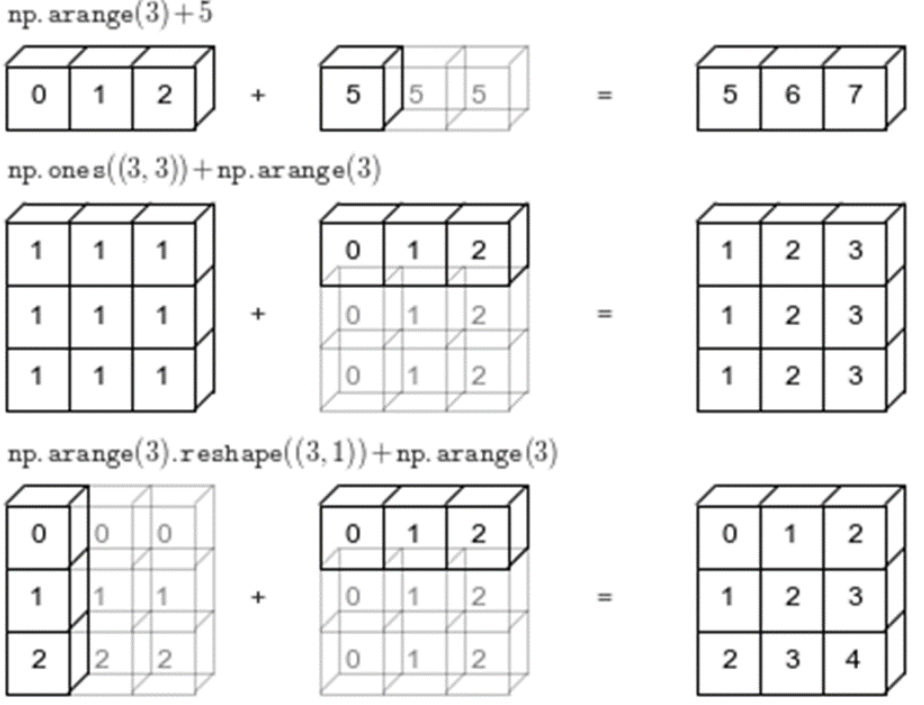

# random module
- 넘파이의 랜덤 모듈은 파이썬 램덤 모듈과 달리 다차원 배열로 생성 가능

## np.random.rand()
- 0이상 1미만의 임의의 실수를 생성. shape을 전달하면 그 크기에 맞는 다차원 배열 생성
- [0,1) 범위에서 균등분포 난수 생성

In [111]:
a = np.random.rand()  # 난수 1개 발생 
print(a)
b = np.random.rand(3)  # 1차원 벡터 생성
print(b)
c = np.random.rand(3,4)  # 2차원 배열 생성
print(c)

0.7274355137182333
[0.54088093 0.13145815 0.41366737]
[[0.77872881 0.58390137 0.18263144 0.82608225]
 [0.10540183 0.28357668 0.06556327 0.05644419]
 [0.76545582 0.01178803 0.61194334 0.33188226]]


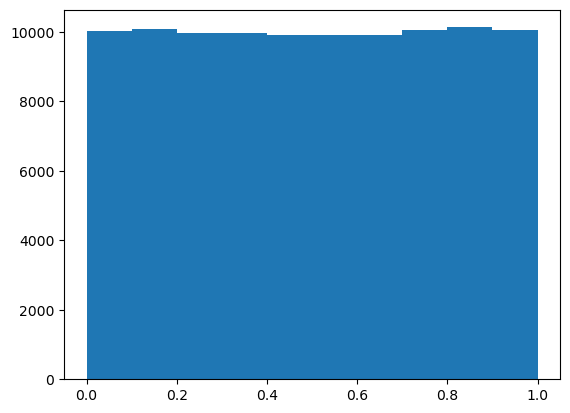

In [113]:
import matplotlib.pyplot as plt

data = np.random.rand(100000)
plt.hist(data, bins=10)
plt.show()  # 균등한 난수 발생

## np.random.randint()
- 주어진 범위의 임의의 정수를 만든다

In [136]:
a = np.random.randint(3)  # 0이상 3미만의 임의의 정수 1개 생성
print(a)

b = np.random.randint(3, size=10) # 0이상 3미만의 임의의 정수 10개 생성
print(b)

c = np.random.randint(3, 10)  # 3이상 10미만의 임의의 정수 1개 생성
print(c)

d = np.random.randint(1, 46, 3) # 1이상 46미만의 임의의 정수 3개 생성  (start, end, size)
print(d)

e = np.random.randint(0, 100, (3,3)) # 0이상 100미만의 임의의 정수 3x3 모양으로 생성
print(e)

0
[0 2 0 1 2 0 2 1 1 2]
8
[36  9 20]
[[ 2 46 76]
 [42 99 89]
 [80 99 41]]


## np.random.randn()
- 표준정규분포(표준편차가 1이고, 평균은 0인 데이터)로 샘플링된 난수를 발생

In [144]:
a = np.random.randn()  # 난수 1개 생성
print(a)

a = np.random.randn(3)  # 1차원 벡터 생성
print(a)

a = np.random.randn(3,4)  # 3행4열의 2차원 배열 생성
print(a)

-1.8343409563603554
[-0.04374949 -1.15618406  0.08421026]
[[-0.58606552  0.91787281  0.46272002  0.41460416]
 [ 0.32580507 -0.8084445  -0.09917336 -0.90723419]
 [ 2.09909316 -0.01643677 -0.24152079 -0.75210361]]


## np.random.choice()

In [151]:
a = np.random.randint(1, 51, 20)

# replace = False: 중복 샘플링을 하지 않는다(비복원추출), default => True
x = np.random.choice(a, size=(3,), replace=False)   # 20개의 난수에서 임의의 값 3개 추출
print(x)

[11  2 32]
